# Τεχνικές Εξόρυξης Δεδομένων - Εργαστηριακή Άσκηση 4
---

Αυτή η εργαστηριακή άσκηση έχει ως επίκεντρο την την κατηγοριοποίηση μέσω Logistic Regression. <img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/01/Logistic-Regression-Example-Logistic-Regression-In-R-Edureka-300x291.png">
Πηγή: https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/01/Logistic-Regression-Example-Logistic-Regression-In-R-Edureka-300x291.png

Η διαδικασία αυτή πρακτικά κατασκευάζει μια συνάρτηση (Sigmoid Function) η οποία μας δείχνει την πιθανότητα μια εγγραφή να ανήκει σε μια κατηγορία. Στο απλό παράδειγμα της εικόνας, η συνάρτηση αυτή εμφανίζεαι με μπλε χρώμα. Είναι εμφανές ότι τα άτομα με **χαμηλό CGPA** (Μ.Ο.) έχουν **λιγότερες πιθανότητες να εγκριθεί η είσοδος τους** (Admission). Όταν εμφανιστούν νέες εγγραφές, η κατηγοριοποίηση τους θα γίνει μέσω της συνάρτησης αυτής.

Στην άσκηση αυτή θα εργαστείτε με το _Pima Indians Diabetes Database_. To dataset αυτό περιέχει τα αποτελέσματα των εξετάσων στα οποία υποβλήθηκαν 769 άτομα, καθώς και την διάγνωση τους (αν πάσχουν από σακχαρώδη διαβήτη). Σκοπός σας θα είναι να κατασκευάσετε ένα μοντέλο, το οποίο, δεδομένων τον αποτελεσμάτων των εξετάσεων ενός ατόμου, θα "προβλέπει" αν το άτομο πάσχει από την ασθένεια.

Στην άσκηση αυτή θα γίνει χρήση των παρακάτω βιβλιοθηκών:
* pandas (για εύκολη και γρήγορη προσπέλαση στα δεδομένα μέσω των dataframes)
* numpy (για μετασχηματισμος των δεδομένων σε αποδεκτή μορφή)
* matplotlib (pyplot module) (για γραφικές παράστασεις)
* sklearn.linear_model (LogisticRegression module)

In [4]:
# Χρησιμοποιώντας την εντολή import, εισάγετε τις προαναφερθείσες βιβλιοθήκες
# Αν δεν είναι εγκατεστημένες μπορείτε να χρησιμοποιήσετε την εντολή: !pip install <module1> <module2> ... 
# για να την εγκαταστήσετε.
# Συνίσταται να ορίσετε local names (pd για το pandas, plt για το matplotlib.pyplot και sns για το seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/DataMining/"
# Χρησιμοπoείται για inline plotting
%matplotlib inline 

Mounted at /content/drive


---
## 1. "Διάβασμα" dataset

Μπορείτε να κατεβάσετε το παραπάνω dataset εκτελώντας το παρακάτω κελί.

In [ ]:
# Λήψη archive dataset

!wget https://eclass.uoa.gr/modules/document/file.php/D424/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B5%CF%82/%CE%A5%CE%BB%CE%B9%CE%BA%CF%8C%202%CE%B7%CF%82%20%CE%B5%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1%CF%82%202020-21/diabetes.csv -c

# Πλέον θα υπάρχει το diabetes.csv στον κατάλογο :)

--2021-05-27 14:16:39--  https://eclass.uoa.gr/modules/document/file.php/D424/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B5%CF%82/%CE%A5%CE%BB%CE%B9%CE%BA%CF%8C%202%CE%B7%CF%82%20%CE%B5%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1%CF%82%202020-21/diabetes.csv
Resolving eclass.uoa.gr (eclass.uoa.gr)... 88.197.27.9
Connecting to eclass.uoa.gr (eclass.uoa.gr)|88.197.27.9|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://eclass.uoa.gr/main/login_form.php?next=%2Fmodules%2Fdocument%2Ffile.php%2FD424%2F%25CE%2595%25CF%2581%25CE%25B3%25CE%25B1%25CF%2583%25CE%25AF%25CE%25B5%25CF%2582%2F%25CE%25A5%25CE%25BB%25CE%25B9%25CE%25BA%25CF%258C%25202%25CE%25B7%25CF%2582%2520%25CE%25B5%25CF%2581%25CE%25B3%25CE%25B1%25CF%2583%25CE%25AF%25CE%25B1%25CF%2582%25202020-21%2Fdiabetes.csv [following]
--2021-05-27 14:16:40--  https://eclass.uoa.gr/main/login_form.php?next=%2Fmodules%2Fdocument%2Ffile.php%2FD424%2F%25CE%2595%25CF%2581%25CE%25B3%25CE%25B1%25CF%2583%25CE%25AF%25CE%25B5%

In [5]:
# Δημιουργήστε ένα dataframe από το dataset

df = pd.read_csv(path+"diabetes.csv")

# εκτυπώστε τις πρώτες 10 εγγραφές

df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Σιγουρευτείτε ότι το dataset περιέχει μόνο non-null τιμές
# Yπόδειξη: χρησιμοποιήστε την μέθοδο info()

df.info()


---
## 2. "Εξερεύνηση" Dataset
Χρησιμοποιήστε την [`pandas.DataFrame.plot.pie`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) για να κατασκευάσετε ένα pie chart με τους νοσούντες και μη.

   Outcome
0      500
1      268


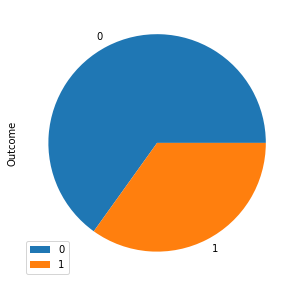

In [6]:
# Χρησιμοποιήστε την value_counts() για να βρείτε πόσες φορές εμφανίζεται κάθε τιμή στην στήλη Outcome

res = df['Outcome'].value_counts()

# Κατασκευάστε ένα νέο dataframe από το αποτέλεσμα
# Υπόδειξη: Χρησιμοποιήστε την to_frame()

res = res.to_frame()

print(res)

# Δημιουργήστε την γραφική παράσταση
# Υπόδειξη: Συμβουλευτέιτε τον συνδεσμο για το documentation παραπάνω

plot = res.plot.pie(y='Outcome',figsize=(5,5))


---
## 3. Δημιουργία Μοντέλου
Συνήθως, όταν κατασκευάζεται (ή "εκπαιδεύεται) ένα μοντέλο Machine Learning δεν χρησιμοποιείται ολόκληρο το train set. Χρησιμοποιώντας ένα μέρος αυτού για την "εκπαίδευση", μας απομένει ένα σύνολο εγγραφών για τις οποίες όμως γνωρίζουμε την σωστή κατηγορία. Παίρνοντας προβλέψεις από το μοντέλο για τις εγγραφές αυτές και συγκρίνοντας τες με τις πραγματικές, μπορεί κανείς να αποφανθεί για την ποιότητα του.

In [8]:
# Δημιουργήστε δύο νέα dataframes: dftrain και dftest
# dftrain: πρώτες 650 εγγραφές του dataset
# dftest: οι υπόλοιπες 118

dftrain = df[:700]
dftest = df[701:]


Σε αυτό το σημείο, θα πρέπει να γίνει κανονικοποίηση (mean=0, deviation=1) των δεδομένων για τους εξής δύο λόγους:
* Αποφυγή φαινομένου αριθμητικής αστάθειας (Οι αριθμοί αποθηκεύονται με μεγαλύτερη ακρίβεια κοντά στο 0!)
* Πολύ μεγάλες ή πολύ μικρές τιμές δεν θα μπορούν να επηρεάσουν αρνητικά την ακρίβεια του μοντέλου

Για τον σκοπό αυτό, θα γίνει χρήση του τύπου numpy.array. Η κλάση αυτή προσφέρει τις μεθόδους [`mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) και [`std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

In [9]:
# Θα πρέπει να κατασκευάσετε τα εξής αντικείμενα τύπου numpy.array:
# traindata : περιέχει όλες τις στήλες εκτός της Outcome από το dftrain
# trainlabel: περιέχει μόνο την στήλη Outcome του dftrain
# testlabel : περιέχει όλες τις στήλες εκτός της Outcome από το dftest
# testlabel: περιέχει μόνο την στήλη Outcome του dftest
# Υπόδειξη: Θα χρειαστεί η dataframe.drop

trainlabel = np.asarray(dftrain['Outcome'])
traindata = np.asarray(dftrain.drop('Outcome',1))

testlabel = np.asarray(dftest['Outcome'])
testdata = np.asarray(dftest.drop('Outcome',1))

# Βρείτε (μέσω των συναρτήσεων που αναφέρθηκαν) την μέση τιμή και την τυπική απόκλιση 
# του trainData

means = np.mean(traindata, axis=0)
stds = np.std(traindata, axis=0)

# Κανονικοποιήστε το trainData και το testdata, αφαιρώντας από κάθε τιμή την μέση τιμή και διαιρώντας 
# με την τυπική απόκλιση

traindata = (traindata - means)/stds
testdata = (testdata - means)/stds

# Εκτυπώστε την μέση τιμή και την τυπική απόκλιση. Τι παρατηρείτε;

print(np.mean(traindata,0))
print(np.std(traindata,0))

[ 9.64307999e-17  8.62801893e-17  2.24582258e-16 -5.83660104e-17
  5.32907052e-17 -8.62801893e-17  9.38931472e-17  2.15700473e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


Μπορείτε (επιτέλους) σε αυτό το σημείο να κάνετε train το μοντέλο σας μέσω της [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

**Σημείωση:** Μην δώσετε κανένα όρισμα (να έχουν όλα default τιμές).

In [1]:
# Υπόδειξη: Κάνετε fit τα traindata και trainlabel

model = LogisticRegression()

model.fit(traindata,trainlabel)


NameError: ignored

In [ ]:
# Μπορείτε να ελέγξετε την ακρίβεια του μοντέλου που μόλις κατασκευάσατε στο testdata
# εκτελώντας αυτό το κελί

accuracy = model.score(testdata, testlabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  80.59701492537313 %


[[ 0.48154341  0.54447108  0.50126452  0.88534503 -0.55391299  0.55143407
   0.19208855  1.25171488]
 [-1.02327975 -1.11261482  0.25474099  0.5335523  -0.55391299 -0.10392051
  -0.25268024 -0.43499311]
 [ 1.08347268  1.46507436  0.17256648 -1.16677921 -0.55391299 -0.41287339
   0.2646052  -0.34621901]
 [-1.02327975 -1.00740302  0.25474099  0.18175957  0.02915332  0.03651261
  -0.54919276 -1.32273416]
 [-1.32424438  0.25513862 -0.81352767  0.88534503  0.48816296  1.44084387
   2.86875866 -0.2574449 ]
 [ 0.18057878 -0.29722334  0.58343903 -1.16677921 -0.55391299 -0.1975426
  -0.4944024  -0.52376722]
 [-0.42135049 -1.29673547 -0.40265511  0.70944866 -0.00806368  0.30801666
  -0.41866279 -0.87886364]
 [ 1.68540194 -0.32352629 -2.45701791 -1.16677921 -0.55391299  0.71059162
  -0.60237164 -0.61254132]
 [-0.72231512  1.83331567  0.41909001  1.47166623  2.81422536  0.26120561
  -0.56369609  1.51803719]
 [ 1.08347268 -0.06049679  1.48735867 -1.16677921 -0.55391299 -2.59426794
  -0.44444649  1.6

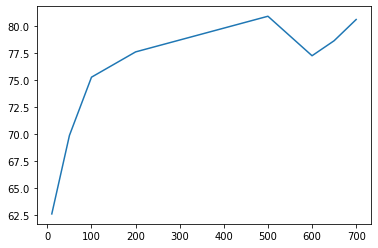

In [11]:
# Δοκιμάστε τα παρακάτω μεγέθη στο train set και χρησιμοποιήστε την matplotlib.plot() για
# να κατασκευάσετε μια γραφική παράσταση μεγέθους train set-ακρίβεια μοντέλου

l = [10, 50, 100, 200 , 500 , 600 , 650 , 700]

results = []

for split in l:
    dftrain = df[:split]
    dftest = df[(split+1):]
    
    trainlabel = np.asarray(dftrain['Outcome'])
    traindata = np.asarray(dftrain.drop('Outcome',1))
    testlabel = np.asarray(dftest['Outcome'])
    testdata = np.asarray(dftest.drop('Outcome',1))
    means = np.mean(traindata, axis=0)
    stds = np.std(traindata, axis=0)
    traindata = (traindata - means)/stds
    testdata = (testdata - means)/stds
    print(traindata)
    model = LogisticRegression()
    model.fit(traindata,trainlabel)
    
    accuracy = model.score(testdata, testlabel)
    print("accuracy = ", accuracy * 100, "%")
    
    results.append(accuracy*100)
  
plt.plot(l,results)
plt.show()

Τέλος, θα πρέπει να υπολογίσετε πόσο "επηρεάζει" κάθε χαρακτηριστικό το αποτέλεσμα του μοντέλου. Αυτό μπορεί να γίνει παρατηρώντας το **βάρος** κάθε χαρκτηριστικού (coefficient).

<AxesSubplot:>

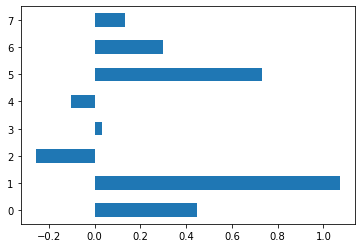

In [ ]:
# Δημιουργήστε τα εξής:
# coeff: Λίστα με τα βάρη κάθε χαρακτηριστικού (Υπόδειξη: μέθοδος coef_)
# labels: Λίστα με τα ονόματα των στηλών χωρίς το Outcome

coeff = list(model.coef_[0])
labels = list(dftrain.drop('Outcome',1).columns)

# Δημιουργήστε ένα νέο dataframe με στήλες τις λίστες που δημιουργήσατε

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff

# Δημιουργήστε ένα barh (horizontal bar) plot με τα βάρη κάθε χαρακτηριστικού

features.importance.plot(kind='barh')

Αν και η γραφική που κατασκευάσατε περιέχει την σωστή πληροφορία, δεν είναι απολύτως ξεκάθαρο τι αντιπροσωπεύει. Βελτιώστε την γραφική σας παράσταση ακολουθώντας τα παρακάτω βήματα:

Text(0, 0.5, 'Features')

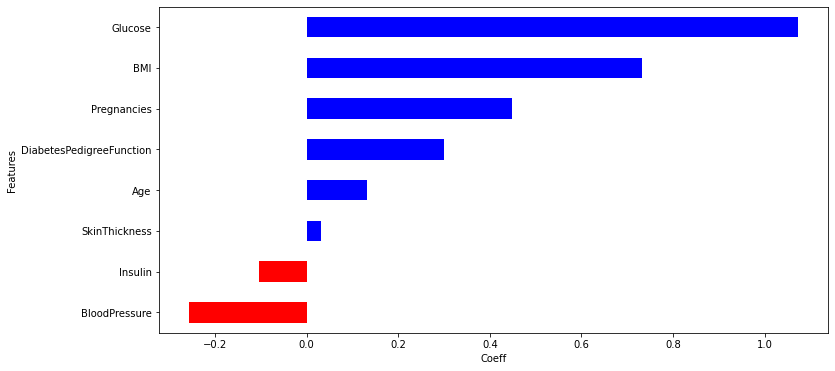

In [ ]:
# Ταξινομήστε τα χαρακτηριστικά στο dataframe ανάλογα με το βάρος τους
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# Υπόδειξη: sort_values() με τα κατάλληα ορίσματα

features.sort_values(by=['importance'], ascending=True, inplace=True)

# Δημιουργήστε μία νέα στήλη 'Positive'. Η positive θα πρέπει να περιέχει True
# αν το βάρος ειναι θετικό και False αν το βάρος είναι αρνητικό

features['positive'] = features['importance'] > 0

features.head()

# Χρησιμοποιήστε την set_index με τα κατάλληλα ορίσματα για να αντικαταστήσετε τις τιμές του άξονα y
# με τις ονομασίες των χαρακτηριστικών
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
# Η εκτέλεση της γραμμής αυτής παραπάνω από μία φορές ενδεχομένως να οδηγήσει σε KeyError

features.set_index('Features',inplace=True)

# Τέλος, προβάλλετε την γραφική όπως πριν χρησιμοποιώντας τα εξής επιπλεόν ορίσματα:
# color = features.positive.map({True: 'blue', False: 'red'}) : Τα χαρακτηριστικά με την τιμή True
# στην νέα στήλη Positive που δημιουργήσατε θα έχουν μπλε χρώμα, ενώ τα υπόλοιπα κόκκινο
# figsize=(12, 6): Ορίζει το μέγεθος της γραφικής παράστασης

features.importance.plot(kind='barh', figsize=(12, 6),color = features.positive.map({True: 'blue', False: 'red'}))

# Δώστε (μέσω των μεθόδος xlabel() και ylabel()) τα κατάλληλα ονόματα σε κάθε άξονα

plt.xlabel('Coeff')
plt.ylabel('Features')

Πλέον έχετε πολύ καλύτερη εικόνα του βάρους κάθε χαρακτηριστικού. Γράψτε στο παρακάτω κελί συνοπτικά τις παρατηρήσεις σας.

> Χατζής Χρήστος - cs120004@di.uoa.gr - v1.0